<a href="https://colab.research.google.com/github/rc-j/Ml-pascal-assignments/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Define Averages, Variance, Covariance and Gaussian distributions and it's uses in data understanding. Write functions to compute these values for given data. Reference - Stephen's Book - Section 2.4

=> Average: The average or mean of dataset is a measure of central tendency that represent the centeral value of data.

=>Variance: Variance is the measure of the spread of dataset around it s mean. It is calculated by the total average of the squared differences from the mean.

=>Covariance: Covariance is a measure of the relationship between two variables or features in a dataset.

=>Gaussian distributions: They are family of continuous probability distributions characterized by a bell-shaped curve. They are defined by two parameters mean (μ) and the standard deviation (σ).

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

daily_death_dataset = [10,15,20, 25,27]

def compute_average(data):
    return np.mean(data)

def compute_variance(data):
    return np.var(data)

def compute_covariance(data):
    return np.cov(data)

def compute_gaussian_params(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

def plot_gaussian(data, ax=None):
    """Plot the Gaussian distribution of a dataset."""
    mean, std_dev = compute_gaussian_params(data)
    x = np.linspace(min(data), max(data), 100)
    pdf = norm.pdf(x, mean, std_dev)
    if ax is None:
        _, ax = plt.subplots()
    ax.plot(x, pdf)
    ax.set_xlabel('Value')
    ax.set_ylabel('Probability Density')
    ax.set_title('Gaussian Distribution')

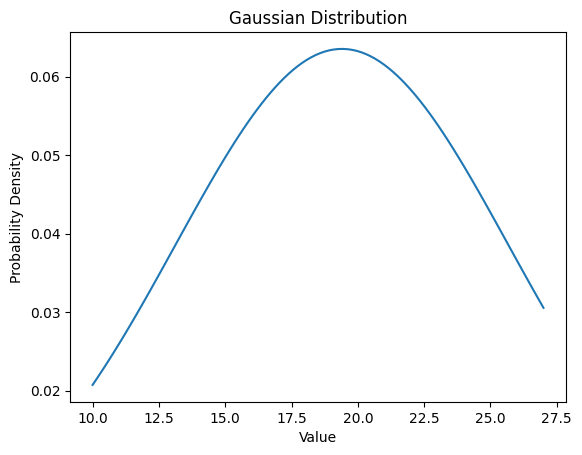

Average: 19.40
Variance: 39.44
Covariance:
49.3
Gaussian Parameters: Mean=19.40, Standard Deviation=6.28


In [4]:
# Calculate the statistics
average = compute_average(daily_death_dataset)
variance = compute_variance(daily_death_dataset)
covariance = compute_covariance(daily_death_dataset)
mean, std_dev = compute_gaussian_params(daily_death_dataset)
diagram = plot_gaussian(daily_death_dataset)
plt.show(diagram)

print(f"Average: {average:.2f}")
print(f"Variance: {variance:.2f}")
print("Covariance:")
print(covariance)
print(f"Gaussian Parameters: Mean={mean:.2f}, Standard Deviation={std_dev:.2f}")

#2. Collect 20 samples for a 4 class news dataset (Politics, Health, Education, Sports) (5 sample per class). Create a random model to predict a class for a given news text. Calculate the accuracy of the model. Accuracy = correctly classified news/ total news.

In [6]:
import random
from sklearn.metrics import accuracy_score

# Sample data
data = [
    ("The new government's economic policies are causing concern among businesses.", "Politics"),
    ("Diplomatic tensions between neighboring countries have escalated.", "Politics"),
    ("Proposed reforms to the healthcare system are sparking heated debates.", "Politics"),
    ("The upcoming election is expected to be closely contested.", "Politics"),
    ("Public sector workers are demanding better wages and working conditions.", "Politics"),
    ("A recent study found a link between air pollution and respiratory illnesses.", "Health"),
    ("The flu season has been particularly severe this year, leading to increased hospitalizations.", "Health"),
    ("Advancements in cancer treatment are offering new hope for patients.", "Health"),
    ("Mental health awareness campaigns are gaining traction across the country.", "Health"),
    ("The pandemic has highlighted the need for stronger public health infrastructure.", "Health"),
    ("Schools are implementing new technology-based learning programs.", "Education"),
    ("Educators are advocating for reforms to improve the quality of education.", "Education"),
    ("Challenges in teacher recruitment and retention are impacting school systems.", "Education"),
    ("Early childhood education is receiving increased attention from policymakers.", "Education"),
    ("Budget cuts are forcing universities to make difficult decisions.", "Education"),
    ("The local sports team's recent winning streak has energized their fanbase.", "Sports"),
    ("Olympic athletes are facing new challenges as they prepare for the upcoming games.", "Sports"),
    ("The latest sports season has been marked by unexpected twists and turns.", "Sports"),
    ("Innovative training methods are helping athletes achieve new levels of performance.", "Sports"),
    ("The sports community is mourning the loss of a legendary figure.", "Sports")
]

# Extract texts and true labels
texts, true_labels = zip(*data)

# Define possible classes
classes = ["Politics", "Health", "Education", "Sports"]

# Random model: randomly predict one of the four classes
random_predictions = [random.choice(classes) for _ in texts]

# Calculate accuracy
accuracy = accuracy_score(true_labels, random_predictions)

print(f"Random Model Accuracy: {accuracy:.2f}")

# Display results
for text, true_label, prediction in zip(texts, true_labels, random_predictions):
    print(f"Text: {text}\nTrue Label: {true_label}, Predicted Label: {prediction}\n")

Random Model Accuracy: 0.35
Text: The new government's economic policies are causing concern among businesses.
True Label: Politics, Predicted Label: Education

Text: Diplomatic tensions between neighboring countries have escalated.
True Label: Politics, Predicted Label: Politics

Text: Proposed reforms to the healthcare system are sparking heated debates.
True Label: Politics, Predicted Label: Sports

Text: The upcoming election is expected to be closely contested.
True Label: Politics, Predicted Label: Education

Text: Public sector workers are demanding better wages and working conditions.
True Label: Politics, Predicted Label: Politics

Text: A recent study found a link between air pollution and respiratory illnesses.
True Label: Health, Predicted Label: Politics

Text: The flu season has been particularly severe this year, leading to increased hospitalizations.
True Label: Health, Predicted Label: Education

Text: Advancements in cancer treatment are offering new hope for patients

#3. Create a dataset of a monthly expense in kathmandu over past 5 years. Create a random model to predict monthly expense for given year and month. Calculate MSE and RMSE for randomly selected 20 samples from the dataset.

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define the new arrays
months_array = np.array([
    '2022-01-31', '2022-04-30', '2022-07-31', '2022-10-31', '2023-01-31',
    '2023-04-30', '2023-07-31', '2023-10-31', '2024-01-31', '2024-04-30',
    '2024-07-31', '2024-10-31', '2025-01-31', '2025-04-30', '2025-07-31',
    '2025-10-31', '2026-01-31', '2026-04-30', '2026-07-31', '2026-10-31'
])

expenses_array = np.array([
    800.0, 850.0, 900.0, 950.0, 1000.0,
    1050.0, 1100.0, 1150.0, 1200.0, 1250.0,
    1300.0, 1350.0, 1400.0, 1450.0, 1500.0,
    1550.0, 1600.0, 1650.0, 1700.0, 1750.0
])

# Create a random model to predict expenses
np.random.seed(42)
predicted_expenses = np.random.uniform(low=800, high=1800, size=20)  # Random predictions

# Select 20 random samples from the dataset
random_indices = np.random.choice(len(expenses_array), 20, replace=False)
random_true_expenses = expenses_array[random_indices]

# Calculate MSE and RMSE
mse = mean_squared_error(random_true_expenses, predicted_expenses)
rmse = sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print("Randomly selected true expenses:", random_true_expenses)
print("Random model predicted expenses:", predicted_expenses)

MSE: 152540.41326031263
RMSE: 390.564224245274
Randomly selected true expenses: [1050. 1700.  850. 1150.  800. 1300. 1400. 1750. 1000. 1600. 1200.  950.
 1100. 1350.  900. 1450. 1650. 1500. 1550. 1250.]
Random model predicted expenses: [1174.54011885 1750.71430641 1531.99394181 1398.6584842   956.01864044
  955.99452034  858.08361217 1666.17614577 1401.11501174 1508.0725778
  820.5844943  1769.90985216 1632.4426408  1012.33911068  981.82496721
  983.40450985 1104.24224296 1324.75643163 1231.94501864 1091.2291402 ]
